In [2]:
from itertools import chain

import torch # Tensor Package (for use on GPU)
import torch.nn as nn ## Neural Network package
import torch.nn.functional as F # Non-linearities package
import torch.optim as optim # Optimization package
from torch.utils.data import Dataset, TensorDataset, DataLoader # for dealing with data
import torchvision # for dealing with vision data
import torchvision.transforms as transforms # for modifying vision data to run it through models

import matplotlib.pyplot as plt # for plotting
import numpy as np

# 1)  Introduction

Links:

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html - Pytorch's Tensor Tutorial

https://pytorch.org/docs/stable/index.html - Pytorch's documentation


### Quick Tensor Demonstration:

In [3]:
# here's a one dimensional array the pytorch way (i.e. allowing GPU computations):
x1 = torch.tensor([1.0, 2.0, 3.0, 4.0])

# here's a two dimensional array (i.e. of size 2 x 4):
x2 = torch.tensor([[5, 6, 7, 8], [9, 10, 11, 12]])

# here's a three dimensional array (i.e. of size 2 x 2 x 4):
x3 = torch.tensor([[[1, 2, 3, 4], [5, 6, 7, 8]], [[9, 10, 11, 12], [13, 14, 15, 16]]])

In [4]:
# x1

print("----------------------------------------")
print(x1[0])
print("----------------------------------------")
# prints tensor(1.)

----------------------------------------
tensor(1.)
----------------------------------------


### Single element from tensor is a zero dimension tensor and not a python primitive like in numpy

In [5]:
x1[0].size()

torch.Size([])

In [6]:
# x2

print("----------------------------------------")
print(x2[0, 0]) 


print("----------------------------------------")
print(x2[0, :]) 

print("----------------------------------------")
print(x2[:, 2])
print("----------------------------------------")

----------------------------------------
tensor(5)
----------------------------------------
tensor([5, 6, 7, 8])
----------------------------------------
tensor([ 7, 11])
----------------------------------------


In [7]:
# x3

print("----------------------------------------")
print(x3[0, 0, 0]) 
# prints 1.0; the first entry of the first vector of the first set of vectors

print("----------------------------------------")
print(x3[:, 0, 0]) 
# prints 1, 9; the first entry of each first vector in each set of vectors

print("----------------------------------------")
print(x3[0, :, 0]) 
# prints 1, 5; pick the first set of vectors, and from each vector, choose the first entry

print("----------------------------------------")
print(x3[0, 0, :]) 
print("----------------------------------------")
# prints 1, 2, 3, 4; everything in the first vector of the first set

----------------------------------------
tensor(1)
----------------------------------------
tensor([1, 9])
----------------------------------------
tensor([1, 5])
----------------------------------------
tensor([1, 2, 3, 4])
----------------------------------------


### Gradient Computation

In [8]:
x = torch.ones(2, 2, requires_grad=True)
# tensor with requires_grad set to True so we can use it for training and other stuff later

print("----------------------------------------")
print(x)
print("----------------------------------------")

----------------------------------------
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
----------------------------------------


In [9]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [10]:
z = y * y * 3
out = z.mean()

print("----------------------------------------")
print(z, out)
print("----------------------------------------")

----------------------------------------
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
----------------------------------------


In [11]:
# Compute gradients
out.backward()

print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


# 2)  Basic Linear Regression Model 

In [12]:
# x is a single datapoint
x = torch.tensor([1.0, 2.0, 3.0, 4.0])

linear_layer1 = nn.Linear(4, 1)
# create a linear layer (i.e. a linear equation: w1x1 + w2x2 + w3x3 + w4x4 + b, with 4 inputs and 1 output)
# w and b stand for weight and bias, respectively


# Model parameters
print("----------------------------------------")
print(list(linear_layer1.named_parameters()))
print("----------------------------------------")

----------------------------------------
[('weight', Parameter containing:
tensor([[ 0.4952, -0.0880, -0.3639, -0.4884]], requires_grad=True)), ('bias', Parameter containing:
tensor([0.1374], requires_grad=True))]
----------------------------------------


In [13]:
predicted_y = linear_layer1(x)
# run the datapoint x through the linear equation and put the output in predicted_y

print("----------------------------------------")
print(predicted_y)
print("----------------------------------------")

----------------------------------------
tensor([-2.5887], grad_fn=<AddBackward0>)
----------------------------------------


# 3)  Calculating The Loss Function 

In [14]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0])

linear_layer1 = nn.Linear(4, 1)

# ideally, we want our model to predict 0 when we input our x1 variable below.
target_y = torch.tensor([0.0])


predicted_y = linear_layer1(x)
print("----------------------------------------")
print(predicted_y)
print("----------------------------------------")

----------------------------------------
tensor([0.0570], grad_fn=<AddBackward0>)
----------------------------------------


In [15]:
loss_function = nn.MSELoss()

loss = loss_function(predicted_y, target_y)

print("----------------------------------------")
print(loss)
print("----------------------------------------")

----------------------------------------
tensor(0.0033, grad_fn=<MseLossBackward>)
----------------------------------------


# 4)  Recalculating/Updating Our Weights (using gradient of loss wrt weights) 

In [16]:
# For reproducibility
torch.manual_seed(123)

# Now, we're going to calculate the gradient of our loss function wrt our weights / biases

x = torch.tensor([1.0, 2.0, 3.0, 4.0])

linear_layer1 = nn.Linear(4, 1)

target_y = torch.tensor([0.0])

predicted_y = linear_layer1(x)

loss_function = nn.MSELoss()

loss = loss_function(predicted_y, target_y)

loss.backward()

# now that we have computed the gradient, let's look at our weights before we change them:

print("----------------------------------------")
print("Weights (before update):")
print(linear_layer1.weight)
print(linear_layer1.bias)

learning_rate = 0.1
for f in linear_layer1.parameters():
    f.data.sub_(f.grad.data * learning_rate)
# we told the optimizer to subtract the learning rate * the gradient from our model weights

print("----------------------------------------")
print("Weights (after update):")
print(linear_layer1.weight)
print(linear_layer1.bias)

----------------------------------------
Weights (before update):
Parameter containing:
tensor([[-0.2039,  0.0166, -0.2483,  0.1886]], requires_grad=True)
Parameter containing:
tensor([-0.4260], requires_grad=True)
----------------------------------------
Weights (after update):
Parameter containing:
tensor([[-0.0864,  0.2516,  0.1042,  0.6586]], requires_grad=True)
Parameter containing:
tensor([-0.3085], requires_grad=True)


### Use pytorch's optimizer to auto update the weights

In [17]:
# For reproducibility
torch.manual_seed(123)

# Now, we're going to calculate the gradient of our loss function wrt our weights / biases

x = torch.tensor([1.0, 2.0, 3.0, 4.0])

linear_layer1 = nn.Linear(4, 1)

target_y = torch.tensor([0.0])

predicted_y = linear_layer1(x)

optimizer = optim.SGD(linear_layer1.parameters(), lr=0.1)
# here we've created an optimizer object that's responsible for changing the weights
# we told it which weights to change (those of our linear_layer1 model) and how much to change them (learning rate / lr)
# but we haven't quite told it to change anything yet. First we have to calculate the gradient.

loss_function = nn.MSELoss()

loss = loss_function(predicted_y, target_y)

loss.backward()

# now that we have computed the gradient, let's look at our weights before we change them:

print("----------------------------------------")
print("Weights (before update):")
print(linear_layer1.weight)
print(linear_layer1.bias)

optimizer.step()
# we told the optimizer to subtract the learning rate * the gradient from our model weights

print("----------------------------------------")
print("Weights (after update):")
print(linear_layer1.weight)
print(linear_layer1.bias)

----------------------------------------
Weights (before update):
Parameter containing:
tensor([[-0.2039,  0.0166, -0.2483,  0.1886]], requires_grad=True)
Parameter containing:
tensor([-0.4260], requires_grad=True)
----------------------------------------
Weights (after update):
Parameter containing:
tensor([[-0.0864,  0.2516,  0.1042,  0.6586]], requires_grad=True)
Parameter containing:
tensor([-0.3085], requires_grad=True)


# 5)  Updating Our Weights More Than Once (i.e. doing step 3-4 a few times aka "epochs") 

In [18]:
# For reproducibility
torch.manual_seed(123)

# this block of code is organized a little differently than section 4, but it's mostly the same code
# the only three differences are:
# - The "Hyperparameter" constants
# - The for loop (for helping the model do <number of epochs> training steps)
# - The linear_layer1.zero_grad() function call on line 25. 
#   (that's just to clear the gradients in memory, since we're starting the training over each iteration/epoch)

x = torch.tensor([1.0, 2.0, 3.0, 4.0])
linear_layer1 = nn.Linear(4, 1)
target_y = torch.tensor([0.0])

print("----------------------------------------")
print("Output (BEFORE UPDATE):")
print(linear_layer1(x))

NUMBER_OF_EPOCHS = 3 # Number of times to update the weights
LEARNING_RATE = 1e-2
loss_function = nn.MSELoss()
optimizer = optim.SGD(linear_layer1.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    linear_layer1.zero_grad() # Needed to clear the gradient buffer before each backprop
    predicted_y = linear_layer1(x)
    loss = loss_function(predicted_y, target_y)
    loss.backward()
    optimizer.step()
    
    print("----------------------------------------")
    print("Output (UPDATE " + str(epoch + 1) + "):")
    print(linear_layer1(x))
    print("Should be getting closer to 0...")

print("----------------------------------------")

----------------------------------------
Output (BEFORE UPDATE):
tensor([-0.5876], grad_fn=<AddBackward0>)
----------------------------------------
Output (UPDATE 1):
tensor([-0.2233], grad_fn=<AddBackward0>)
Should be getting closer to 0...
----------------------------------------
Output (UPDATE 2):
tensor([-0.0848], grad_fn=<AddBackward0>)
Should be getting closer to 0...
----------------------------------------
Output (UPDATE 3):
tensor([-0.0322], grad_fn=<AddBackward0>)
Should be getting closer to 0...
----------------------------------------


# 6)  Making Our Epochs Only Use A Subset Of The Data (i.e. a "minibatch") 

In [19]:
# For reproducibility
torch.manual_seed(123)

x = torch.Tensor([[0.0, 0.0, 1.0, 1.0],
                 [0.0, 1.0, 1.0, 0.0],
                 [1.0, 0.0, 1.0, 0.0],
                 [1.0, 1.0, 1.0, 1.0]])
target_y = torch.Tensor([0.0, 1.0, 1.0, 0.0])
# now, instead of having 1 data sample, we have 4 (oh yea, now we're in the big leagues)
# but, pytorch has a DataLoader class to help us scale up, so let's use that.

inputs = x # let's use the same naming convention as the pytorch documentation here
labels = target_y # and here

train = TensorDataset(inputs, labels) # here we're just putting our data samples into a tiny Tensor dataset class

trainloader = DataLoader(train, batch_size=2, shuffle=False) # and then putting the dataset above into a data loader
# the batchsize=2 option just means that, later, when we iterate over it, we want to run our model on 2 samples at a time

linear_layer1 = nn.Linear(4, 1)

NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 1e-1
loss_function = nn.MSELoss()
optimizer = optim.SGD(linear_layer1.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader): # here we split apart our data so we can run it
        linear_layer1.zero_grad()
        predicted_y = linear_layer1(inputs)
#         loss = loss_function(predicted_y, labels)
        loss = loss_function(predicted_y, labels.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        print("----------------------------------------")
        print("Output (UPDATE: Epoch #" + str(epoch + 1) + ", Batch #" + str(batch_idx + 1) + "):")
        print(linear_layer1(x))
        print("Should be getting closer to [0, 1, 1, 0]...") # but some of them aren't! we need a model that fits better...
                                                             # next up, we'll convert this model from regression to a NN

print("----------------------------------------")


----------------------------------------
Output (UPDATE: Epoch #1, Batch #1):
tensor([[-0.0085],
        [-0.0633],
        [-0.4495],
        [-0.0300]], grad_fn=<AddmmBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #1, Batch #2):
tensor([[ 0.2904],
        [ 0.2356],
        [-0.0057],
        [ 0.4198]], grad_fn=<AddmmBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #2, Batch #1):
tensor([[0.3562],
        [0.4069],
        [0.0891],
        [0.5620]], grad_fn=<AddmmBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #2, Batch #2):
tensor([[0.3697],
        [0.4204],
        [0.1938],
        [0.5543]], grad_fn=<AddmmBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #3, Batch #1):
tensor([[0.3747],
        [0.5203]

# 7)  Changing Our Model from Linear Regression to Neural Network (to make it fit the data better) 

In [20]:
# For reproducibility
torch.manual_seed(123)

x = torch.Tensor([[0.0, 0.0, 1.0, 1.0],
                 [0.0, 1.0, 1.0, 0.0],
                 [1.0, 0.0, 1.0, 0.0],
                 [1.0, 1.0, 1.0, 1.0]])
target_y = torch.Tensor([0.0, 1.0, 1.0, 0.0])
# now, instead of having 1 data sample, we have 4 (oh yea, now we're in the big leagues)
# but, pytorch has a DataLoader class to help us scale up, so let's use that.

inputs = x # let's use the same naming convention as the pytorch documentation here
labels = target_y # and here

train = TensorDataset(inputs, labels) # here we're just putting our data samples into a tiny Tensor dataset class

trainloader = DataLoader(train, batch_size=2, shuffle=False) # and then putting the dataset above into a data loader
# the batchsize=2 option just means that, later, when we iterate over it, we want to run our model on 2 samples at a time

# Two layer Neural architecture
linear_layer1 = nn.Linear(4, 2)
sigmoid = nn.Sigmoid() # this is the nonlinearity that we pass the output from layers 1 and 2 into
linear_layer2 = nn.Linear(2, 1) # this is our second layer (i.e. we're going to pass the outputs from sigmoid into here)

NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 0.1
loss_function = nn.MSELoss()
optimizer = optim.SGD(chain(linear_layer1.parameters(), linear_layer2.parameters()), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        linear_layer1.zero_grad()
        linear_layer2.zero_grad()
        
        linear_layer1_output = linear_layer1(inputs)
        sigmoid_output = sigmoid(linear_layer1_output)
        linear_layer2_output = linear_layer2(sigmoid_output)
        sigmoid_output_2 = sigmoid(linear_layer2_output) # see how the output from one layer just goes into the second?
        
        loss = loss_function(sigmoid_output_2, labels.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        print("----------------------------------------")
        print("Output (UPDATE: Epoch #" + str(epoch + 1) + ", Batch #" + str(batch_idx + 1) + "):")
        print(sigmoid(linear_layer2(sigmoid(linear_layer1(x))))) # the nested functions are getting out of hand..
        print("Should be getting closer to [0, 1, 1, 0]...") # they are if you increase the epochs amount... but it's slow!

print("----------------------------------------")

----------------------------------------
Output (UPDATE: Epoch #1, Batch #1):
tensor([[0.3545],
        [0.3687],
        [0.3595],
        [0.3563]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #1, Batch #2):
tensor([[0.3564],
        [0.3707],
        [0.3614],
        [0.3582]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #2, Batch #1):
tensor([[0.3585],
        [0.3731],
        [0.3635],
        [0.3603]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #2, Batch #2):
tensor([[0.3604],
        [0.3751],
        [0.3653],
        [0.3621]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #3, Batch #1):
tensor([[0.3625],
        [0.3775]

# 8) Abstracting our Neural Network into its PyTorch class (i.e. making it more maintainable and less messy)

In [21]:
# For reproducibility
torch.manual_seed(123)

x = torch.Tensor([[0.0, 0.0, 1.0, 1.0],
                 [0.0, 1.0, 1.0, 0.0],
                 [1.0, 0.0, 1.0, 0.0],
                 [1.0, 1.0, 1.0, 1.0]])
target_y = torch.Tensor([0.0, 1.0, 1.0, 0.0])
# now, instead of having 1 data sample, we have 4 (oh yea, now we're in the big leagues)
# but, pytorch has a DataLoader class to help us scale up, so let's use that.

inputs = x # let's use the same naming convention as the pytorch documentation here
labels = target_y # and here

train = TensorDataset(inputs, labels) # here we're just putting our data samples into a tiny Tensor dataset class

trainloader = DataLoader(train, batch_size=2, shuffle=False) # and then putting the dataset above into a data loader
# the batchsize=2 option just means that, later, when we iterate over it, we want to run our model on 2 samples at a time

# Two layer Neural architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 2) # here's where we define the same layers we had earlier
        self.fc2 = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x) # the forward function just sends everything through its respective layers
        x = sigmoid(x) # including through the sigmoids after each Linear layer
        x = self.fc2(x)
        x = sigmoid(x)
        return x

net = Net() # we made a blueprint above for our neural network, now we initialize one.

NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 0.1
loss_function = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        net.zero_grad()
        
        output = net(inputs) # but now, all we have to do is pass our inputs to the neural net 
        
        loss = loss_function(output, labels.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        print("----------------------------------------")
        print("Output (UPDATE: Epoch #" + str(epoch + 1) + ", Batch #" + str(batch_idx + 1) + "):")
        print(sigmoid(linear_layer2(sigmoid(linear_layer1(x))))) # the nested functions are getting out of hand..
        print("Should be getting closer to [0, 1, 1, 0]...") # they are if you increase the epochs amount... but it's slow!

print("----------------------------------------")

# Awesome, so we have a neural network (nn) in the actual PyTorch Net class.
# As it stands right now, there's tons of optimization that can be done here.
# But, at the risk of falling for premature optimization, let's get to the end and build our full-fledged CNN first.

----------------------------------------
Output (UPDATE: Epoch #1, Batch #1):
tensor([[0.3643],
        [0.3794],
        [0.3692],
        [0.3660]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #1, Batch #2):
tensor([[0.3643],
        [0.3794],
        [0.3692],
        [0.3660]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #2, Batch #1):
tensor([[0.3643],
        [0.3794],
        [0.3692],
        [0.3660]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #2, Batch #2):
tensor([[0.3643],
        [0.3794],
        [0.3692],
        [0.3660]], grad_fn=<SigmoidBackward>)
Should be getting closer to [0, 1, 1, 0]...
----------------------------------------
Output (UPDATE: Epoch #3, Batch #1):
tensor([[0.3643],
        [0.3794]

# 9)  Changing Our Input From Arbitrary Vectors To Images 

Files already downloaded and verified
Files already downloaded and verified
----------------------------------------
Data and labels shape for a single batch
torch.Size([4, 3, 32, 32]) torch.Size([4])
----------------------------------------
  dog  frog  deer truck


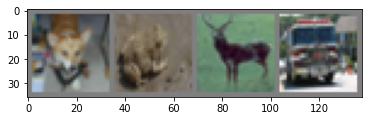

In [24]:
# In preparation for building our Convolutional Neural Network (CNN), we're going to stop using random, arbitrary vectors.
# Instead, we're going to use an actual standardized dataset: CIFAR-10
# We also have built in modules to help us load/wrangle the dataset, so we're going to use those too! (since we're spoiled)

transform = transforms.Compose( # we're going to use this to transform our data to make each sample more uniform
   [
    transforms.ToTensor(), # converts each sample from a (0-255, 0-255, 0-255) PIL Image format to a (0-1, 0-1, 0-1) FloatTensor format
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # for each of the 3 channels of the image, subtract mean 0.5 and divide by stdev 0.5
   ]) # the normalization makes each SGD iteration more stable and overall makes convergence easier

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) # this is all we need to get/wrangle the dataset!
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') # each image can have 1 of 10 labels

# helper function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print("----------------------------------------")
print('Data and labels shape for a single batch')
print(images.shape, labels.shape)
print("----------------------------------------")

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Now that we've got a lot of boilerplate code out of the way, here's how it fits in to what we did above:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 25) # now our first layer accepts inputs the size of the image's total information
        self.fc2 = nn.Linear(25, 10) # Second layer has 25 hidden units
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3) # this just reshapes our tensor of image data so that we have <batch size>
        x = self.fc1(x)             # in one dimension, and then the image data in the other
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

net = Net()

NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 1e-1
loss_function = nn.CrossEntropyLoss() # Changing our loss / cost function to work with our labels
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        net.zero_grad()
        output = net(inputs)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    print("Iteration: " + str(epoch + 1))

In [ ]:
# Awesome! Now it's trained. Time to test it:

dataiter = iter(testloader)
images, labels = dataiter.next() # just grabbing a sample from our test data set

imshow(torchvision.utils.make_grid(images)) # display the images we're going to predict

outputs = net(images) # get our output from our neural network
_, predicted = torch.max(outputs.data, 1) # get our predictions from the output

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# print images
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# and let's look at the overall accuracy:

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100.0 * correct / total))

# Hmm, maybe we can do better. Let's add convolutional layers.

# 11)  Adding A Convolutional Layer 

Conv2D Layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html?highlight=conv2d#torch.nn.Conv2d

In [25]:
# here's all the boilerplate again:
transform = transforms.Compose(
   [
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
   ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # convolve each of our 3-channel images with 6 different 5x5 kernels, giving us 6 feature maps
        self.fc1 = nn.Linear(4704, 120) # but that results in a [Batch]x6x28x28 dimensional output, that is 4704 inputs per image.
        self.fc2 = nn.Linear(120, 10) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid(x)
        x = x.view(-1, 4704) # since our output from conv1 is [Batch]x6x28x28, we need to flatten it into a 4x4704 (samples x features) tensor to feed it into a linear layer
        x = self.fc1(x)             
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

net = Net()

NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 1e-1
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        net.zero_grad()
        output = net(inputs)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    print("Iteration: " + str(epoch + 1))

In [ ]:
# Holy guacamole, that takes a LOT longer. Those convolutions are expensive.
# In the next section we'll make that a little quicker.
# For now, let's see how much our predictions improved.

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
outputs = net(images)
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100.0 * correct / total))

# Okay... pretty good improvement. Again, before we prematurely optimize, let's add some pooling layers to make it quicker.
# THEN we'll go ham on the optimizations.

# 12)  Adding A Pooling Layer 

Pooling Layer - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html?highlight=maxpool#torch.nn.MaxPool2d

In [ ]:
# and again, boilerplate:
transform = transforms.Compose(
   [
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
   ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        # The output of Conv2d is [Batch]x6x28x28
        self.pool = nn.MaxPool2d(2, 2) # in any 2x2 square on each of our feature maps, take the most important (highest) one
        # The output of MaxPool2d is of shape [Batch]x6x14x14
        self.fc1 = nn.Linear(1176, 120) # since we've pooled our outputs from the convolution, tour input is reduced: 4704 -> 1176
        self.fc2 = nn.Linear(120, 10) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid(x) # returns x of size: torch.Size([4, 6, 28, 28])
        x = self.pool(x) # returns x of size: torch.Size([4, 6, 14, 14]) (so we have to adjust our linear input again)
        x = x.view(-1, 1176) # now our input to the linear layer is going to be 4 by 6 * 14 * 14 = 1176
        x = self.fc1(x)             
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

net = Net()

NUMBER_OF_EPOCHS = 3
LEARNING_RATE = 1e-1
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        net.zero_grad()
        output = net(inputs)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    print("Iteration: " + str(epoch + 1))

In [ ]:
# Pretty significant speedup! Let's see how it affects accuracy:

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
outputs = net(images)
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100.0 * correct / total))

# Not by much! Awesome!
# Now, let's add a few more layers, change our nonlinearities around, and do some other house keeping:

# 13) Homework - Do Some Final Optimizations (i.e. making our first sigmoid a "ReLU",  and adding more layers)

In [ ]:
transform = transforms.Compose(
   [
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
   ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5) # Let's add more feature maps - that might help
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5) # And another conv layer with even more feature maps
        self.fc1 = nn.Linear(20 * 5 * 5, 120) # and finally, adjusting our first linear layer's input to our previous output
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x) # we're changing our nonlinearity / activation function from sigmoid to ReLU for a slight speedup
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x) # after this pooling layer, we're down to a torch.Size([4, 20, 5, 5]) tensor.
        x = x.view(-1, 20 * 5 * 5) # so let's adjust our tensor again.
        x = self.fc1(x)             
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x

# net = Net()
net = Net().cuda() # Let's make our NN run on the GPU (I didn't splurge on this GTX 1080 for nothing...)

NUMBER_OF_EPOCHS = 25 # Let's also increase our training cycles
LEARNING_RATE = 1e-2 # And decrease our learning rate a little bit to compensate
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        net.zero_grad()
#         inputs, labels = inputs.cuda(), labels.cuda() # Let's also make these tensors GPU compatible
        output = net(inputs)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    if epoch % 5 == 0:
        print("Iteration: " + str(epoch + 1))

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
outputs = net(images.cuda())
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    inputs = images.cuda()
    labels = labels.cuda()
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Awesome! A lot better!

# 14)  Bask... in the glory that is our newly created Convolutional Neural Network (CNN)!

In [ ]:
# Awesome - we have a full blown convolutional neural network!
# Let's condense some stuff and put it all together without comments:

transform = transforms.Compose(
   [
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
   ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc1 = nn.Linear(20 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 20 * 5 * 5)           
        x = F.relu(self.fc1(x) )
        x = F.relu(self.fc2(x))
        return x

net = Net().cuda()

NUMBER_OF_EPOCHS = 25
LEARNING_RATE = 1e-2
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

for epoch in range(NUMBER_OF_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        net.zero_grad()
        inputs, labels = inputs.cuda(), labels.cuda()
        output = net(inputs)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
    if epoch % 5 is 0:
        print("Iteration: " + str(epoch + 1))

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
outputs = net(images.cuda())
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

correct = 0
total = 0
for data in testloader:
    images, labels = data
    labels = labels.cuda()
    outputs = net(images.cuda())
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))